# Part 2

**Problem: Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Problem 1?**

Import libraries:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

#!conda install -c conda-forge folium=0.11.0 --yes
import folium

print('Libraries Imported')


Libraries Imported


Import 311 NYC dataset:

In [3]:
#https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
path = 'data/fhrw-4uyv.csv'

#import only for relevant columns
columns_used = ['unique_key', 'created_date', 'complaint_type', 'incident_zip', 'incident_address', 'street_name', 'address_type', 'city', 'resolution_description', 'borough', 'latitude', 'longitude', 'closed_date', 'location_type']

#total number of rows defined as 10 million
df_311 = pd.read_csv(path, parse_dates = ['created_date'], usecols = columns_used, nrows=10000000) 
df_311.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type
0,2020-10-25 12:36:48,47979046,WATER LEAK,10468.0,2715 WEBB AVENUE,WEBB AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.869648,-73.902030,NaN,RESIDENTIAL BUILDING
1,2020-10-25 15:56:03,47979693,HEAT/HOT WATER,11422.0,148-56 262 PLACE,262 PLACE,ADDRESS,Rosedale,The following complaint conditions are still o...,QUEENS,40.653249,-73.725543,NaN,RESIDENTIAL BUILDING
2,2020-10-25 02:06:31,47977676,HEAT/HOT WATER,10028.0,221 EAST 83 STREET,EAST 83 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.776599,-73.954748,NaN,RESIDENTIAL BUILDING
3,2020-10-25 16:47:11,47979139,HEAT/HOT WATER,11213.0,1689 CARROLL STREET,CARROLL STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.666077,-73.930341,NaN,RESIDENTIAL BUILDING
4,2020-10-25 10:21:45,47978127,HEAT/HOT WATER,11213.0,930 PROSPECT PLACE,PROSPECT PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.674070,-73.945831,NaN,RESIDENTIAL BUILDING


Create dataframe of the 'HEAT/HOT WATER' complaint type:

In [4]:
df_311_top_complaint = df_311[df_311['complaint_type'] == 'HEAT/HOT WATER'].reset_index(drop = True)
df_311_top_complaint.head() 


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type
0,2020-10-25 15:56:03,47979693,HEAT/HOT WATER,11422.0,148-56 262 PLACE,262 PLACE,ADDRESS,Rosedale,The following complaint conditions are still o...,QUEENS,40.653249,-73.725543,NaN,RESIDENTIAL BUILDING
1,2020-10-25 02:06:31,47977676,HEAT/HOT WATER,10028.0,221 EAST 83 STREET,EAST 83 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.776599,-73.954748,NaN,RESIDENTIAL BUILDING
2,2020-10-25 16:47:11,47979139,HEAT/HOT WATER,11213.0,1689 CARROLL STREET,CARROLL STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.666077,-73.930341,NaN,RESIDENTIAL BUILDING
3,2020-10-25 10:21:45,47978127,HEAT/HOT WATER,11213.0,930 PROSPECT PLACE,PROSPECT PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.674070,-73.945831,NaN,RESIDENTIAL BUILDING
4,2020-10-25 10:13:54,47979868,HEAT/HOT WATER,10031.0,618 WEST 136 STREET,WEST 136 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.821047,-73.955260,NaN,RESIDENTIAL BUILDING


**Focus on Borough**

Check unique values for 'borough':

In [5]:
df_311_top_complaint['borough'].unique()


array(['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'Unspecified'], dtype=object)

In [6]:
df_311_top_complaint[df_311_top_complaint['borough']=='Unspecified']


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type
928803,2018-03-10 11:16:48,38662770,HEAT/HOT WATER,10463.0,38 WEST 225 STREET,WEST 225 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,Unspecified,40.873635,-73.907926,2018-03-12T13:34:51.000,RESIDENTIAL BUILDING


After checking google maps, the 'latitude' and 'longitude' values correspond to Bronx 'borough' (31-49 W 225th St, The Bronx, NY 10463, EUA):

In [7]:
df_311_top_complaint.at[928803, 'borough'] ='BRONX'


Plot New York City map:

In [8]:
#New York latitude and longitude values 
ny_latitude = 40.73
ny_longitude = -73.93

ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11) #for black and white view: tiles='Stamen Toner'

ny_map

Check missing values:

In [9]:
missing_data_311_top_complaint= df_311_top_complaint.isnull()

for column in missing_data_311_top_complaint.columns.values.tolist():
    print(column)
    print (missing_data_311_top_complaint[column].value_counts())
    print("") 


created_date
False    1331346
Name: created_date, dtype: int64

unique_key
False    1331346
Name: unique_key, dtype: int64

complaint_type
False    1331346
Name: complaint_type, dtype: int64

incident_zip
False    1324215
True        7131
Name: incident_zip, dtype: int64

incident_address
False    1331346
Name: incident_address, dtype: int64

street_name
False    1331346
Name: street_name, dtype: int64

address_type
False    1324558
True        6788
Name: address_type, dtype: int64

city
False    1324358
True        6988
Name: city, dtype: int64

resolution_description
False    1331266
True          80
Name: resolution_description, dtype: int64

borough
False    1331346
Name: borough, dtype: int64

latitude
False    1265970
True       65376
Name: latitude, dtype: int64

longitude
False    1265970
True       65376
Name: longitude, dtype: int64

closed_date
False    1326402
True        4944
Name: closed_date, dtype: int64

location_type
False    1331346
Name: location_type, dtype: int64


Removing NaN's:

In [26]:
df_311_true_values = df_311_top_complaint.dropna()
df_311_true_values.shape

(1261330, 14)

Plot a bar graph to see complaint distribution based on borough:

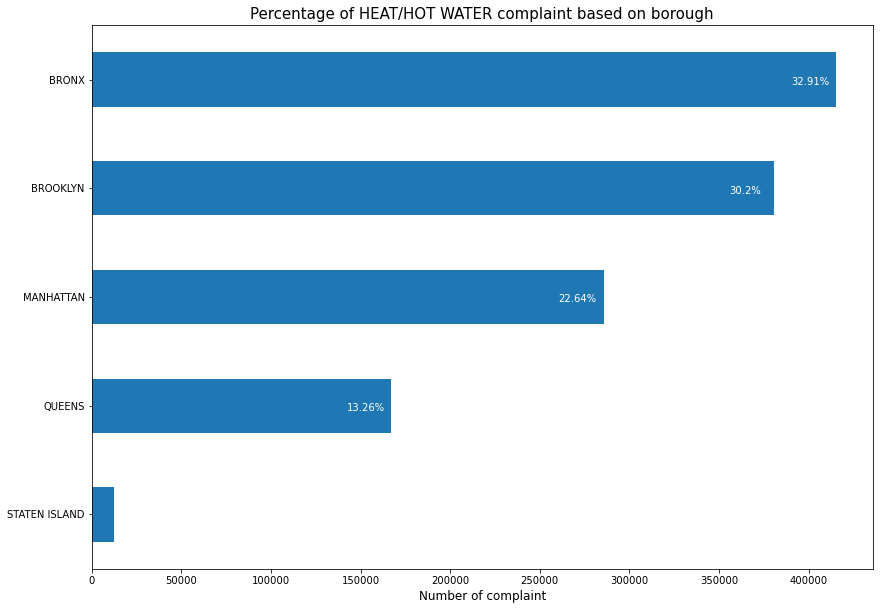

In [11]:
df_311_borough_type = df_311_true_values['borough'].value_counts()
df_311_borough_type.sort_values(ascending = True, inplace =True)
total_borough = df_311_borough_type.sum()

df_311_borough_type.plot(kind = 'barh', figsize = (14, 10))

for index, value in enumerate(df_311_borough_type):
    label = '{}%'.format(round((value/total_borough)*100, 2)) 
    plt.annotate(label, xy = (value - 25000, index- 0.05), color = 'white')
    
plt.title('Percentage of HEAT/HOT WATER complaint based on borough', size=15)
plt.xlabel('Number of complaint', size= 12)
plt.show()


**Map plots will be done with scatter plot because takes to much time to plot in folium map**

*Example with folium but to many points to plot:*

    ##add markers to map

    for lat, lng, label in zip(df_311_true_values['latitude'], df_311_true_values['longitude'], df_311_true_values['borough']):
        folium.CircleMarker([lat, lng], radius=5,
                            color='blue', fill=True,
                            fill_color='#3186cc', fill_opacity=0.7).add_to(ny_map)  
    
    ny_map

In [43]:
#list borough
list_borough = list(df_311_true_values['borough'].unique())
list_borough


['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']

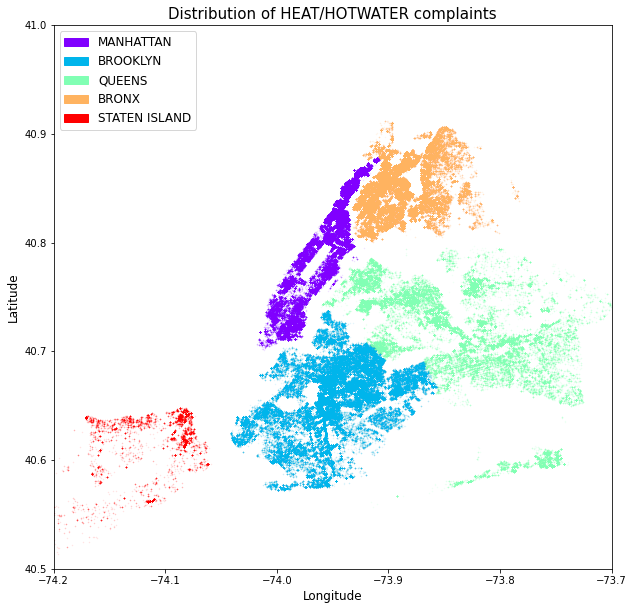

In [29]:
##initializing patches for legends
patches = []

#start figure
plt.figure(figsize=(10,10))

#setting color map
color_map = plt.cm.rainbow(np.linspace(0,1, len(list_borough)))
                           
for index, value in enumerate(list_borough):
    borough_top_complaint = df_311_true_values[df_311_true_values['borough']== value]
    
    #plot
    plt.scatter(borough_top_complaint.longitude, borough_top_complaint.latitude, 
                s=1, alpha=0.1,color= color_map[index], marker ='.')
    
    #create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))
    #------
    
#legend
plt.legend(patches, list_borough, loc='upper left', prop={'size':12})

plt.title('Distribution of HEAT/HOTWATER complaints', size=15)
plt.xlim((-74.20,-73.70))
plt.ylim((40.50,41.00))
plt.xlabel('Longitude',size=12)
plt.ylabel('Latitude',size=12)
plt.show()

Select top 15 zip codes. Plot a bar graph to see complaint distribution based on zip code:

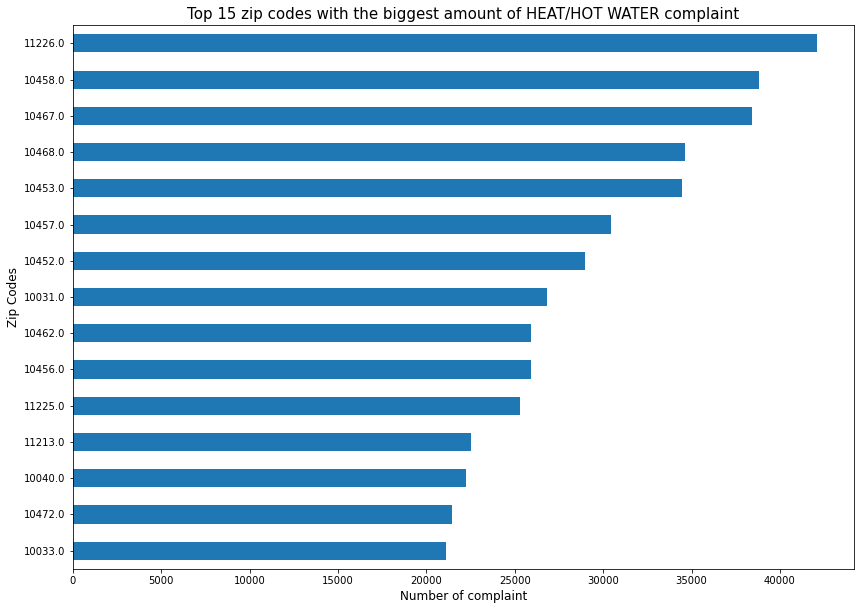

In [35]:
#select top 15 zip codes
df_311_incident_zip_type = df_311_true_values['incident_zip'].value_counts().head(15)
df_311_incident_zip_type.sort_values(ascending = True, inplace =True)
total_incident_zip = df_311_incident_zip_type.sum()

df_311_incident_zip_type.plot(kind = 'barh', figsize = (14, 10))    
    
plt.title('Top 15 zip codes with the biggest amount of HEAT/HOT WATER complaint', size=15)
plt.xlabel('Number of complaint',size=12)
plt.ylabel('Zip Codes',size=12)
plt.show()

In [44]:
#list zip codes
list_zip = df_311_incident_zip_type.keys()
list_zip

Float64Index([10033.0, 10472.0, 10040.0, 11213.0, 11225.0, 10456.0, 10462.0,
              10031.0, 10452.0, 10457.0, 10453.0, 10468.0, 10467.0, 10458.0,
              11226.0],
             dtype='float64')

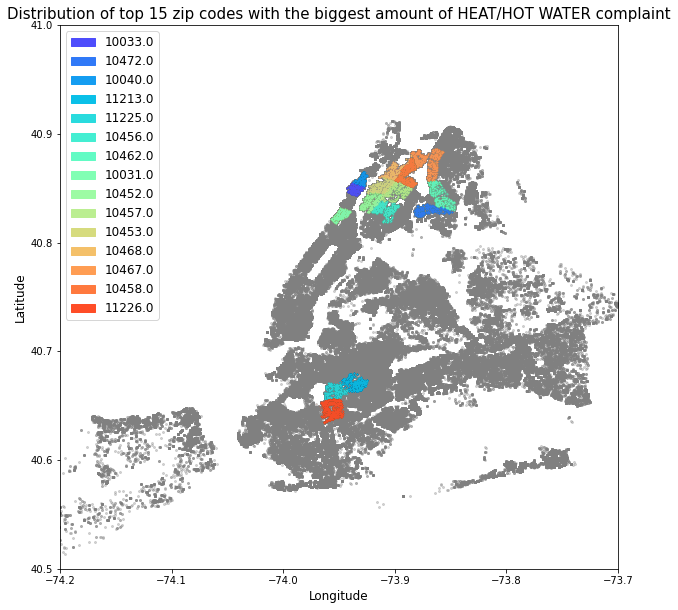

In [45]:
#initializing patches for legends
patches = []

#start figure
plt.figure(figsize=(10,10))

#setting color map
color_map = plt.cm.rainbow(np.linspace(0.1, 0.9, 15))

#new york city base map
plt.scatter(df_311_true_values.longitude, df_311_true_values.latitude, alpha=0.3, s=4, color='grey')
                           
for index, value in enumerate(list_zip):
    zip_top_complaint = df_311_true_values[df_311_true_values['incident_zip']==value]
    
    #plot
    plt.scatter(zip_top_complaint.longitude, zip_top_complaint.latitude, 
                s=1, alpha=0.1,color=color_map[index], marker='.')
    
    #create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))
    #------
    
#legend
plt.legend(patches, list_zip, loc='upper left', prop={'size':12})

plt.title('Distribution of top 15 zip codes with the biggest amount of HEAT/HOT WATER complaint', size=15)
plt.xlim((-74.20,-73.70))
plt.ylim((40.50,41.00))
plt.xlabel('Longitude',size=12)
plt.ylabel('Latitude',size=12)
plt.show()


Select top 15 streets. Plot a bar graph to see complaint distribution based on street:

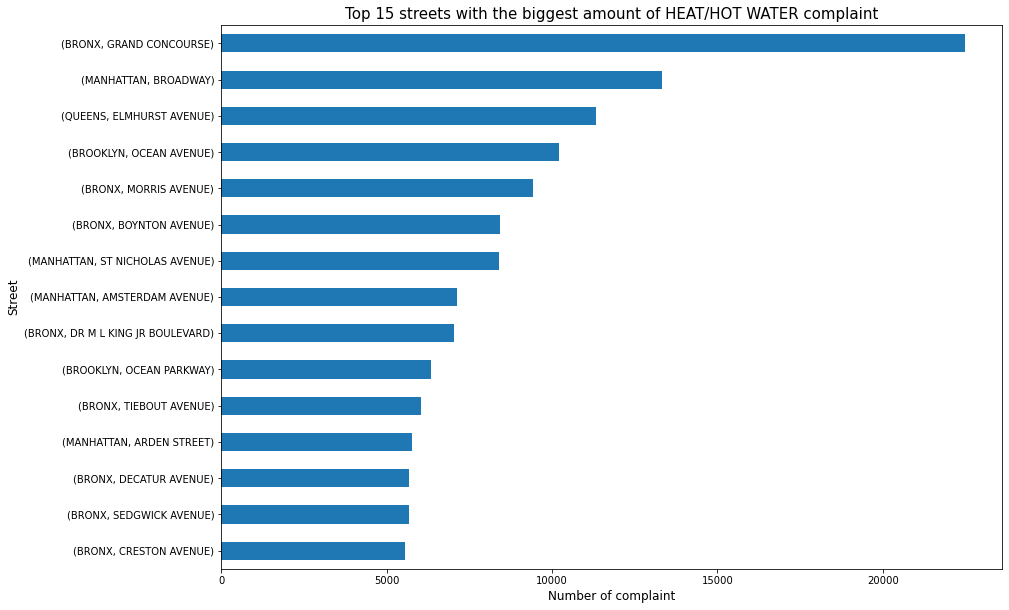

In [47]:
#select top 15 streets
df_311_street_type = df_311_true_values.groupby(['borough'])
df_311_street_type = df_311_street_type['street_name'].value_counts().sort_values(ascending = False).head(15)
df_311_street_type.sort_values(ascending = True, inplace =True)

df_311_street_type.plot(kind = 'barh', figsize = (14, 10))    
    
plt.title('Top 15 streets with the biggest amount of HEAT/HOT WATER complaint', size=15)
plt.xlabel('Number of complaint',size=12)
plt.ylabel('Street',size=12)
plt.show()


In [48]:
#list streets
list_street = df_311_street_type.keys()
list_street


MultiIndex([(    'BRONX',           'CRESTON AVENUE'),
            (    'BRONX',          'SEDGWICK AVENUE'),
            (    'BRONX',           'DECATUR AVENUE'),
            ('MANHATTAN',             'ARDEN STREET'),
            (    'BRONX',           'TIEBOUT AVENUE'),
            ( 'BROOKLYN',            'OCEAN PARKWAY'),
            (    'BRONX', 'DR M L KING JR BOULEVARD'),
            ('MANHATTAN',         'AMSTERDAM AVENUE'),
            ('MANHATTAN',       'ST NICHOLAS AVENUE'),
            (    'BRONX',           'BOYNTON AVENUE'),
            (    'BRONX',            'MORRIS AVENUE'),
            ( 'BROOKLYN',             'OCEAN AVENUE'),
            (   'QUEENS',          'ELMHURST AVENUE'),
            ('MANHATTAN',                 'BROADWAY'),
            (    'BRONX',          'GRAND CONCOURSE')],
           names=['borough', 'street_name'])

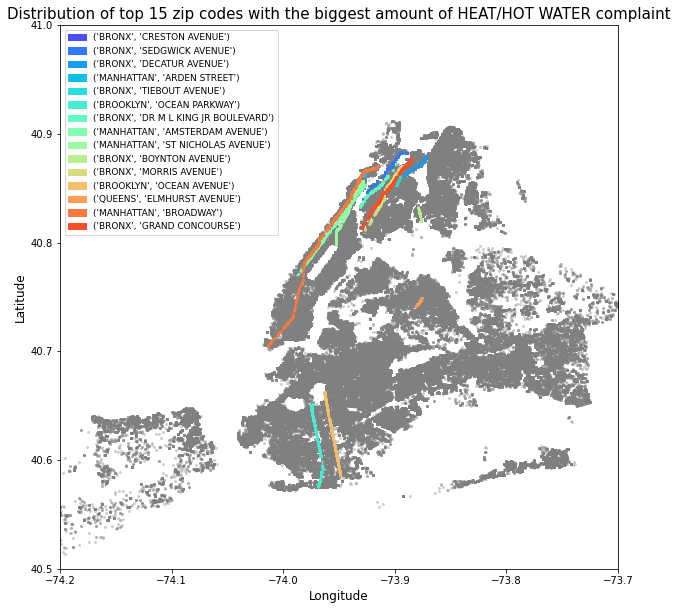

In [59]:
#initializing patches for legends
patches = []

#start figure
plt.figure(figsize=(10,10))

#setting color map
color_map = plt.cm.rainbow(np.linspace(0.1, 0.9, 15))

#new york city base map
plt.scatter(df_311_true_values.longitude, df_311_true_values.latitude, alpha=0.3, s=4, color='grey')
                           
for index, value in enumerate(list_street):
    street_top_complaint = df_311_true_values[np.logical_and(df_311_true_values['borough']== value[0],
                                                              df_311_true_values['street_name']== value[1])]
    
    #plot
    plt.scatter(street_top_complaint.longitude, street_top_complaint.latitude, 
                s=8, alpha=0.7,color=color_map[index], marker='.')
    
    #create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))
    #------
    
#legend
plt.legend(patches, list_street, loc='upper left', prop={'size':9})

plt.title('Distribution of top 15 zip codes with the biggest amount of HEAT/HOT WATER complaint', size=15)
plt.xlim((-74.20,-73.70))
plt.ylim((40.50,41.00))
plt.xlabel('Longitude',size=12)
plt.ylabel('Latitude',size=12)
plt.show()

## Conclusion

List of areas that *Department of Housing Preservation* and *Development of New York City* should focusing first. 
All 3 sections are listed in order of priority.


In terms of borough, they should focus on:

<ol>
    <li>Bronx</li>
    <li>Brooklyn</li>
    <li>Manhattan</li>
    <li>Queens</li>
    <li>Staten Island</li>
</ol>


In terms of zip codes, they can narrow the focus on:

<ol>
    <li>11226.0</li>
    <li>10458.0</li>
    <li>10467.0</li>
    <li>10453.0</li>
    <li>10468.0</li>
    <li>10452.0</li>
    <li>10031.0</li>
    <li>10457.0</li>
    <li>10462.0</li>
    <li>11225.0</li>
    <li>11213.0</li>
    <li>10040.0</li>
    <li>10472.0</li>
    <li>10456.0</li>
    <li>10033.0</li>
</ol>


Lastly in terms of streets, they can narrow the focus further more on:

<ol>
    <li>GRAND CONCOURSE, BRONX</li> 
    <li>BROADWAY, MANHATTAN</li>
    <li>OCEAN AVENUE, BROOKLYN</li>
    <li>MORRIS AVENUE, BRONX</li>
    <li>ELMHURST AVENUE, QUEENS</li>
    <li>BOYNTON AVENUE, BRONX</li>
    <li>ST NICHOLAS AVENUE, MANHATTAN</li>
    <li>AMSTERDAM AVENUE, MANHATTAN</li>
    <li>DR M L KING JR BOULEVARD, BRONX</li>
    <li>OCEAN PARKWAY, BROOKLYN</li>
    <li>TIEBOUT AVENUE, BRONX</li>
    <li>ARDEN STREET, MANHATTAN</li>
    <li>DECATUR AVENUE, BRONX</li>
    <li>SEDGWICK AVENUE, BRONX</li>
    <li>CRESTON AVENUE, BRONX</li>
</ol>